In [1]:
from lib import *

In [2]:
import numpy as np

In [3]:
W1 = np.array(
    [[0.35, 0.35]
     ,[0.15, 0.25]
    ,[0.20, 0.30]]
    )

In [4]:
W2 = np.array(
    [[0.60, 0.60, 0.5]
    ,[0.40, 0.50, 0.4],
    [0.45, 0.55, 0.2]]
    )

In [5]:
X = np.array([[0.05, 0.10],[0.2,0.3]])
Y = np.array([[0, 1, 0],[0, 0, 1]])

In [6]:
model = Model("ajg",ANN(2,3))

In [7]:
layer1 = HiddenLayer("hidden1",2,2,W1,"sigmoid")
layer2 = OutputLayer("hidden2",2,3,W2,"softmax",Y)
model.add(layer1)
model.add(layer2)

In [8]:
model.summary()

Summary for Model: ajg
Layer: hidden1 | Type: hidden | Output shape: 2
Weights:
 [[0.35 0.35]
 [0.15 0.25]
 [0.2  0.3 ]]
_____________________________________
Layer: hidden2 | Type: output | Output shape: 3
Weights:
 [[0.6  0.6  0.5 ]
 [0.4  0.5  0.4 ]
 [0.45 0.55 0.2 ]]


In [9]:
model.predict(X)

array([[0.34413991, 0.38763482, 0.26822527],
       [0.34416353, 0.38914556, 0.2666909 ]])

In [10]:
model.test_backward()

In [11]:
W = np.array([[0.35, 0.35],
              [0.15, 0.25],
              [0.20, 0.30]])

In [12]:
X = np.array([[0.3, 0.05]
              ,[0.003, 0.02],
              [0.00005, 0.025]])
Y = np.array([[1,0],[0,1],[1,0]])


In [18]:
model2 = Model("ajg",ANN(2,2))
model2.add(OutputLayer("output",2,2,W,"softmax",Y))
model2.summary()

Summary for Model: ajg
Layer: output | Type: output | Output shape: 2
Weights:
 [[0.35 0.35]
 [0.15 0.25]
 [0.2  0.3 ]]


In [19]:
losses = [] 
for i in range(1000):
    model2.predict(X)
    model2.test_backward()
    losses.append(model2.ann.layers[-1].loss)
    

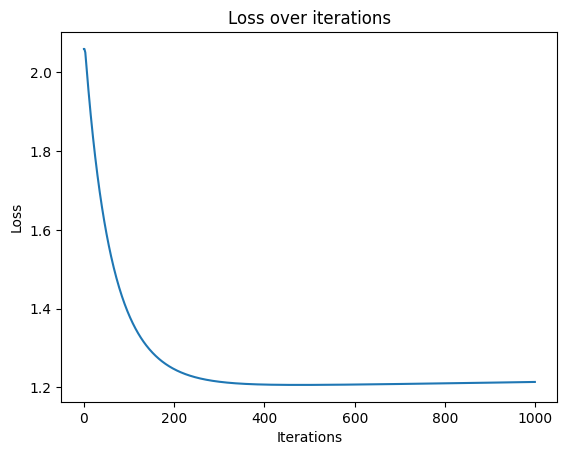

In [20]:
import matplotlib.pyplot as plt
# give it a name
plt.title("Loss over iterations")
# name x axis
plt.xlabel("Iterations")
# name y axis
plt.ylabel("Loss")
# plot the data
plt.plot(losses)

knp loss nya gitu wkwkwk

In [21]:
model2.summary()

Summary for Model: ajg
Layer: output | Type: output | Output shape: 2
Weights:
 [[ 0.61957339  0.08042661]
 [ 1.04616956 -0.64616956]
 [ 0.31496967  0.18503033]]
